<a href="https://colab.research.google.com/github/hemangck/Stress-Detection-with-Machine-Learning-/blob/main/Stress_Detection_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Category - **Social Media**
### Project Topic - **'Stress-Detection-with-Machine-Learning'**


## **Importing all needed packages part**

In [75]:
from IPython.display import Image

In [76]:
import pandas as pd
import numpy as np
from wordcloud import STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

## **Uploading csv file**

In [77]:
path = "/content/dreaddit-train.csv"
df1 = pd.read_csv(path)

In [78]:
path = "/content/dreaddit-test.csv"
df3 = pd.read_csv(path)

## **Understanding Data**

In [79]:
df1.shape
# number of rows and cols of df1

(2838, 116)

In [80]:
df3.shape
# number of rows and cols of df3

(715, 116)

In [81]:
df1.sample()
# sample is generated for df1

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
2627,assistance,9tifas,"[0, 5]","Hi everyone my name is Lily, I'm 19, I live in...",1353,1,0.8,1541150141,9,1.825124,...,1.0,1.0,1.0,1.74525,1.49608,1.87411,0.63,9,4.147182,-0.092553


In [82]:
df3.sample()
# sample is generated for df3

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
494,36370,anxiety,6m23i6,"(0, 5)",And it only took me three doctors telling me t...,0,0.6,1.499533e+09,3,4.101221,...,1.0,1.0,1.0,1.66021,1.45542,1.84188,1.0,1,6.046287,-0.005556


## **Combining Both the datasets to one **

In [83]:
df = pd.concat([df1, df3])

In [84]:
df.shape
# number of rows and cols of df

(3553, 116)

## **EDA (Exploratory Data Analysis)** - *Making data ready for model*



Data Cleaning

In [85]:
df.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1.521614e+09,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1.527010e+09,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1.535936e+09,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1.516430e+09,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1.539809e+09,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [86]:
df.columns

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3553 entries, 0 to 714
Columns: 116 entries, subreddit to sentiment
dtypes: float64(107), int64(5), object(4)
memory usage: 3.2+ MB


In [88]:
df.isnull().sum()
# if null value is there it returns 1 or sum gives sum of null values(frequency) in each cols

,0
subreddit,0
post_id,0
sentence_range,0
text,0
id,0
...,...
lex_dal_avg_pleasantness,0
social_upvote_ratio,0
social_num_comments,0
syntax_fk_grade,0


## **Understanding Polarity and Sentiments**

In [89]:
from textblob import TextBlob

In [90]:
TextBlob("the best").polarity # We find the positive or negative of the words # main code

1.0

In [91]:
TextBlob("the worst").polarity

-1.0

In [92]:
TextBlob("the neutral").polarity

0.0

In [93]:
TextBlob("the great ramesh").polarity

0.8

In [94]:
TextBlob("the best").sentiment # main code

Sentiment(polarity=1.0, subjectivity=0.3)

In [95]:
TextBlob("the worst").sentiment

Sentiment(polarity=-1.0, subjectivity=1.0)

In [96]:
TextBlob("the neutral").sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [97]:
# function defining
def detect_sentiment(text):
  return TextBlob(text).sentiment.polarity

In [98]:
df2 = df[["text"]]

In [99]:
df2.head()

,text
0,"He said he had not felt that way before, sugge..."
1,"Hey there r/assistance, Not sure if this is th..."
2,My mom then hit me with the newspaper and it s...
3,"until i met my new boyfriend, he is amazing, h..."
4,October is Domestic Violence Awareness Month a...


In [100]:
df2["sentiment"]=df2["text"].apply(detect_sentiment)

In [101]:
df2.head()

,text,sentiment
0,"He said he had not felt that way before, sugge...",-0.002742
1,"Hey there r/assistance, Not sure if this is th...",0.292857
2,My mom then hit me with the newspaper and it s...,0.011894
3,"until i met my new boyfriend, he is amazing, h...",0.141671
4,October is Domestic Violence Awareness Month a...,-0.204167


In [102]:
df2.sentiment.value_counts()

,count
sentiment,
0.000000,86
0.250000,24
0.100000,23
0.150000,17
0.125000,16
...,...
-0.204167,1
0.136364,1
-0.079630,1


## **Get stopwords and eliminate them and also import stemmer**

***Note - StopWords are unnecessary words in sentence (comment) for machine learning like is, that etc***.

***Note - Stemmer is package through which we can eliminate any suffix or prefix from word. e.g. eating - 'ing' is eliminated in this case by using stemmer.***

In [103]:
# Importing packages needd for stopwords and unnecessary words eliminating.

import nltk
import re
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string

In [104]:
# Downloading StopWords module

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [105]:
stopwords = set(stopwords.words("english"))

## **Cleaning of data**

In [106]:
# we clean up unnecessary marks
def clean(text):
  text = str(text).lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = [word for word in text.split(' ') if word not in stopwords]
  text=" ".join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text=" ".join(text)
  return text
df2["text"] = df2["text"].apply(clean)

## **Displaying the cleaned data**

In [107]:
df2["text"]

,text
0,said felt way sugget go rest trigger ahead you...
1,hey rassist sure right place post goe im curr...
2,mom hit newspap shock would know dont like pla...
3,met new boyfriend amaz kind sweet good student...
4,octob domest violenc awar month domest violenc...
...,...
710,horribl vivid nightmar everi night sometim the...
711,also cant think without get angri jealous talk...
712,furthermor told got realli serious anxieti dep...
713,here link amazon wish list two item link does...


Let's take a look at the most words

In [108]:
def wc(data,bgcolor):
    plt.figure(figsize=(20,20))
    mask=np.array(Image.open('/content/apple-design-china-name.png'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis("off")

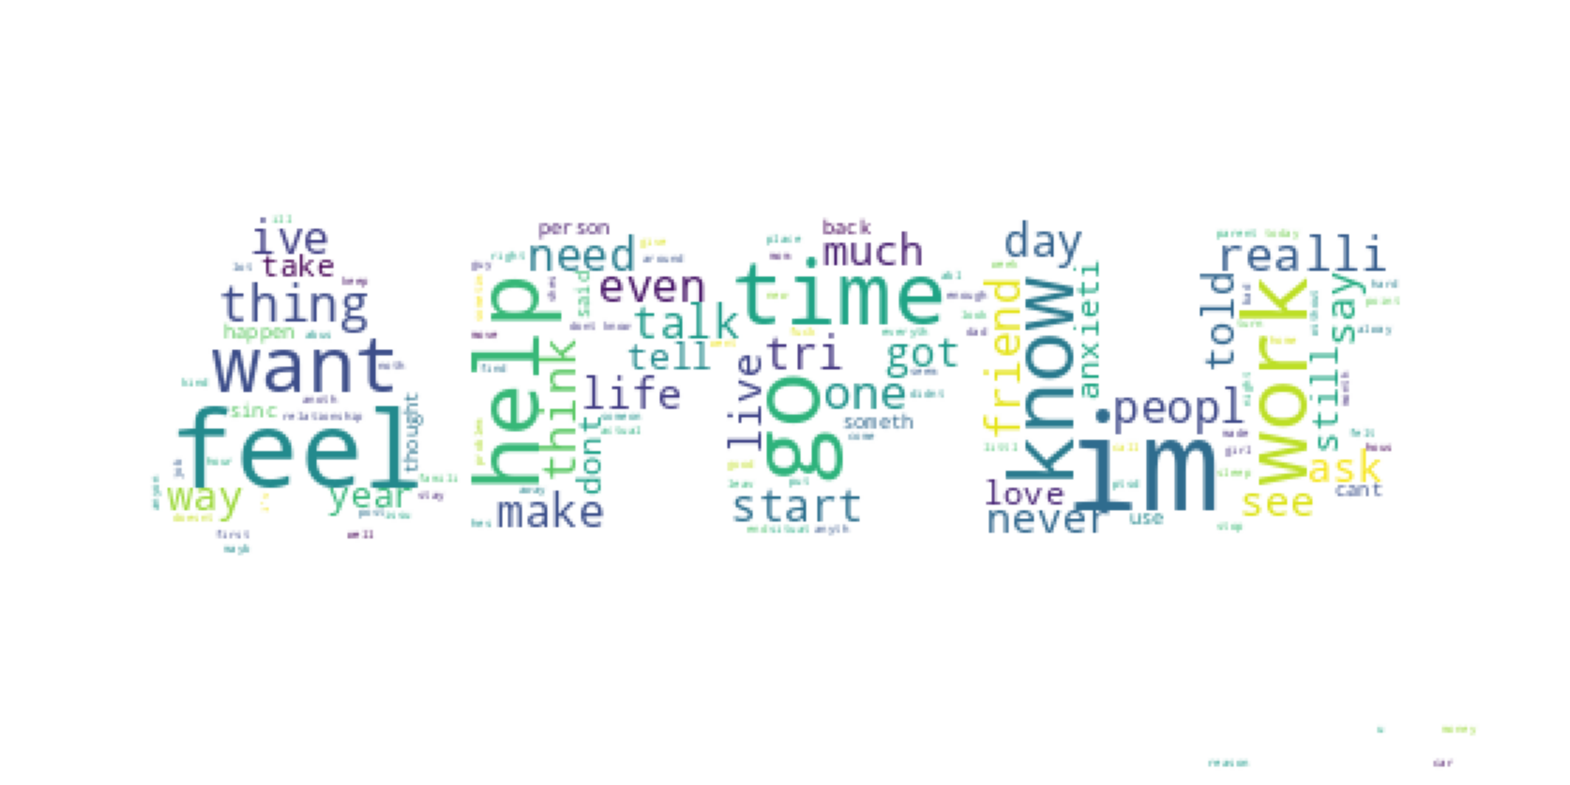

In [109]:
wc(df2.text,'white')

In [110]:
df2["label"]=df["label"].map({0: "No Stress", 1: "Stress"})
df2=df2[["text", "label"]]

In [111]:
df2.head()

,text,label
0,said felt way sugget go rest trigger ahead you...,Stress
1,hey rassist sure right place post goe im curr...,No Stress
2,mom hit newspap shock would know dont like pla...,Stress
3,met new boyfriend amaz kind sweet good student...,Stress
4,octob domest violenc awar month domest violenc...,Stress


In [112]:
df2["sentiment"]=df2["text"].apply(detect_sentiment)

In [113]:
df2.head()

,text,label,sentiment
0,said felt way sugget go rest trigger ahead you...,Stress,0.027273
1,hey rassist sure right place post goe im curr...,No Stress,0.340816
2,mom hit newspap shock would know dont like pla...,Stress,0.124091
3,met new boyfriend amaz kind sweet good student...,Stress,0.229172
4,octob domest violenc awar month domest violenc...,Stress,0.083333


In [114]:
import seaborn as sns

<Axes: xlabel='label', ylabel='count'>

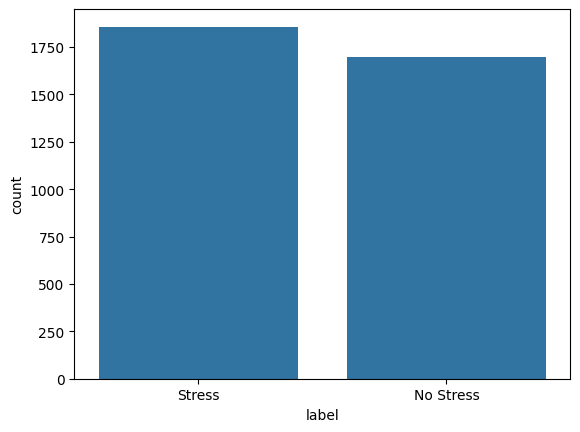

In [115]:
sns.countplot(x=df2.label)

In [116]:
x=df2.text
y=df2.label

In [117]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [118]:
vect=CountVectorizer(stop_words="english")

In [119]:
x = vect.fit_transform(x)

In [120]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [121]:
mb=MultinomialNB()

In [122]:
tahmin=mb.fit(x_train,y_train)

In [123]:
y_pred = tahmin.predict(x_test)

In [124]:
accuracy_score(y_pred,y_test)

0.7401574803149606

In [125]:
user="It was a big company so luckily I didn't have to see him all the time, but when I did, he again acted as though I didn't exist. I tried to talk to him and update him on the pregnancy, and ask him to be involved for our child's sake, and he literally stared right through me without saying a word.  "

In [126]:
user2 = "October is Domestic Violence Awareness Month and I am a domestic violence survivor who is still struggling, even after over four years. Lately I have been feeling very angry. Angry that my abusive ex received no real consequences for his actions. This man abused me in all manners: physically, sexually, emotionally, verbally, financially, etc. I was granted a restraining order against him (and it was renewed a year later) but I was unable to press criminal charges against him because I didn’t have enough evidence to have a case."

In [127]:
df3=vect.transform([user2]).toarray()
output=mb.predict(df3)
print(output)

['Stress']


In [128]:
#saving the model
import pickle
filename = 'redditmodel.sav'
pickle.dump(tahmin, open(filename, 'wb'))

In [129]:
load_model = pickle.load(open(filename,'rb'))

In [130]:
load_model.predict(df3)

array(['Stress'], dtype='<U9')

# **End**